In [4]:
1+1

2

In [123]:
# numpy for numeric & math classes in python
import numpy as np

# Correlation PearsonsR
import scipy
from scipy.stats import pearsonr

# Dataframe
import pandas as pd

#Text File
import csv

# Visualization 
import matplotlib.pyplot as plt

# Main ML library
import sklearn as sk

# Datasets example from sklearn
from sklearn import datasets

# Train test class
from sklearn.model_selection import train_test_split

# Linear Regression Class
from sklearn.linear_model import LinearRegression

# Random Forest
from sklearn.ensemble import RandomForestRegressor

# Tree interpreter for random forest information
# INSTALL : pip install treeinterpreter
from treeinterpreter import treeinterpreter as ti

## IMPORT DATA

In [6]:
filename = "C:/Users/AW186026/Documents/work/dataset/housepricing/HousePricingTrain.csv"
file = open(filename, mode = 'r')
#mode r -> read only, because we do not want to edit this
#mode w if want to write

text = file.read()

print(text)

file.close()

Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,Kitche0bvGr,KitchenQual,TotRmsAbvGrd,Functio0l,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1,60,RL,65,8450,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,Gd,TA,PConc,

In [ ]:
with open(filename,'r') as file:
    print(file.read())
#Same as above, but this one automatically close the context    

In [ ]:
with open(filename,'r') as file:
    print(file.readline())

In [ ]:
# FLAT FILE
#Import to numpy

data = np.loadtxt(filename, delimiter = ',',skiprows=1)
print(data)

#for selected columns
#data = np.loadtxt(filename, delimiter = ',',skiprows=1,usecols=[0,1,12])
#print(data)

#for get first row
#print(data[0])

In [ ]:
# Flat file using recfromcsv
# More fit for multi type values

d = np.recfromcsv(filename)
print(d)

In [7]:
# Flatfile using pandas

data = pd.read_csv(filename)

print(data)

#convert to numpy
data_in_numpy = data.values

#in pandas delimiter is "sep" 
#data = pd.read_csv(file, sep='\t', comment='#', na_values=['Nothing'])

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL           65     8450   Pave     0      Reg   
1        2          20       RL           80     9600   Pave     0      Reg   
2        3          60       RL           68    11250   Pave     0      IR1   
3        4          70       RL           60     9550   Pave     0      IR1   
4        5          60       RL           84    14260   Pave     0      IR1   
5        6          50       RL           85    14115   Pave     0      IR1   
6        7          20       RL           75    10084   Pave     0      Reg   
7        8          60       RL            0    10382   Pave     0      IR1   
8        9          50       RM           51     6120   Pave     0      Reg   
9       10         190       RL           50     7420   Pave     0      Reg   
10      11          20       RL           70    11200   Pave     0      Reg   
11      12          60       RL           85    1192

# VIEW DATA

In [8]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,0,12,2008,WD,Normal,250000


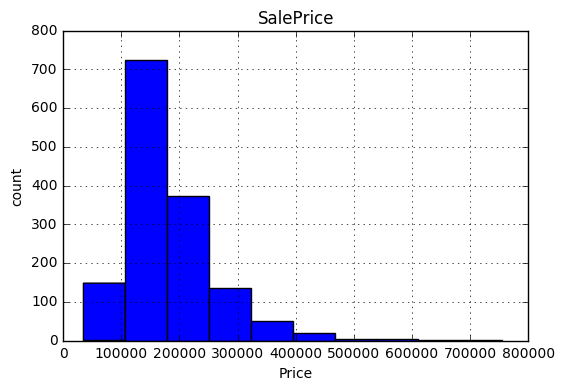

In [10]:
pd.DataFrame.hist(data[['SalePrice']])
plt.xlabel('Price')
plt.ylabel('count')
plt.show()

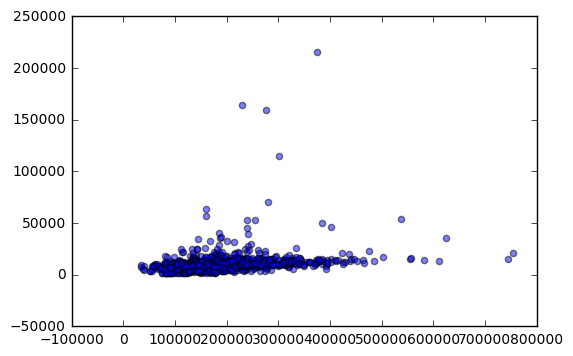

In [9]:
plt.scatter(data[['SalePrice']],data[['LotArea']],alpha = 0.5)
plt.show()

# SPLIT DATA

In [96]:
train, test = train_test_split(data, test_size = 0.3, random_state = 42)

train.shape
test.shape

(438, 81)

# LIN REG MODEL

In [84]:
train.loc[[135,1452],['LotArea','OverallQual','OverallCond','YearBuilt','GarageArea']]

,LotArea,OverallQual,OverallCond,YearBuilt,GarageArea
135,10400,7,6,1970,530
1452,3675,5,5,2005,525


In [156]:
# Create linear regression object
linreg = LinearRegression(normalize = True)

train_features = train.loc[:,['LotArea','OverallQual','OverallCond','YearBuilt','GarageArea']]
train_predict = train['SalePrice']

test_features = test.loc[:,['LotArea','OverallQual','OverallCond','YearBuilt','GarageArea']]
test_predict = test['SalePrice']

In [160]:
# Train the model using the training sets
linreg.fit(train_features,train_predict)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [162]:
'Estimated intercept coefficient', linreg.intercept_

('Estimated intercept coefficient', -438288.78055520612)

In [161]:
'Number of coefficients', len(linreg.coef_)

('Number of coefficients', 4)

# Correlation

In [122]:
pd.DataFrame(zip(train_features.columns, linreg.coef_),columns = ['features','corr'])

,features,corr
0,LotArea,1.117042
1,OverallQual,33701.750649
2,OverallCond,2253.183099
3,YearBuilt,220.955459
4,GarageArea,84.940958


### Pearsons R

In [136]:
print(pearsonr(data['LotArea'], data['SalePrice'])[0])
print(pearsonr(data['OverallQual'], data['SalePrice'])[0])
print(pearsonr(data['OverallCond'], data['SalePrice'])[0])
print(pearsonr(data['YearBuilt'], data['SalePrice'])[0])
print(pearsonr(data['GarageArea'], data['SalePrice'])[0])

0.263843353871
0.790981600584
-0.0778558940487
0.522897332879
0.623431438918


### Change to only related

In [159]:
train_features = train.loc[:,['LotArea','OverallQual','YearBuilt','GarageArea']]
test_features = test.loc[:,['LotArea','OverallQual','YearBuilt','GarageArea']]

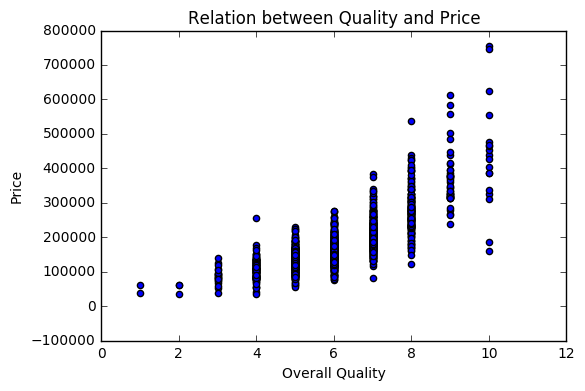

In [92]:
plt.scatter(data['OverallQual'],data['SalePrice'])
plt.xlabel('Overall Quality')
plt.ylabel('Price')
plt.title('Relation between Quality and Price')
plt.show()

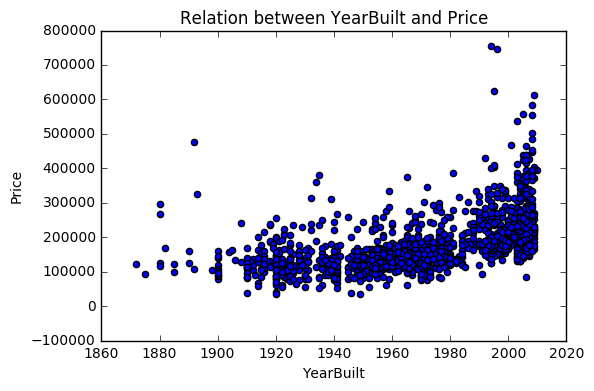

In [93]:
plt.scatter(data['YearBuilt'],data['SalePrice'])
plt.xlabel('YearBuilt')
plt.ylabel('Price')
plt.title('Relation between YearBuilt and Price')
plt.show()

# LIN REG PREDICT

In [98]:
#predict on 5 sample

linreg.predict(test_features[:5])

array([ 160006.7267144 ,  269845.52276633,  122608.45028522,
        163655.46423678,  324125.02702681])

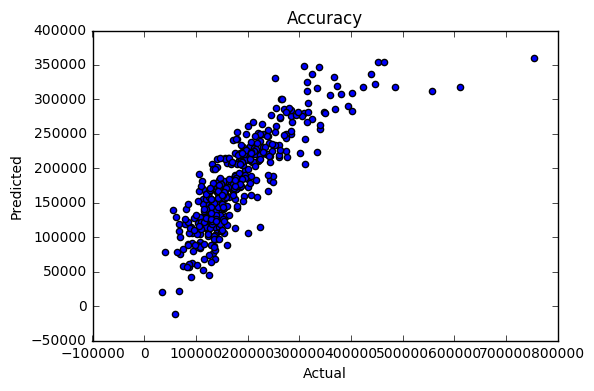

In [163]:
plt.scatter(test_predict,linreg.predict(test_features))
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Accuracy')
plt.show()

# ACCURACY

In [164]:
#Calculate MSE on Train Dataset

mseFul = np.mean((train_predict - linreg.predict(train_features)) ** 2)
mseFul

1843643861.3542957

In [165]:
#Calculate Mean Squared Error on Test Dataset

mseFul = np.mean((test_predict - linreg.predict(test_features)) ** 2)
mseFul

2068106908.2983592

In [196]:
#Calculate R2 on Train Dataset

SSE = np.sum((test_predict - linreg.predict(test_features)) ** 2)
SST = np.sum((test_predict - np.mean(test_predict)) ** 2)

R2 = 1-(SSE/SST)
R2

0.7036286729371808

In [197]:
#Calculate R2 on Train Dataset

SSR = np.sum((linreg.predict(test_features)- np.mean(test_predict)) ** 2)
SST = np.sum((test_predict - np.mean(test_predict)) ** 2)

R2 = (SSR/SST)
R2

0.62739315945515262

Residual Plots:

Residual plots are a good way to visualize the errors in your data.  If you have done a good job then your data should be randomly scattered around line zero. If you see structure in your data, that means your model is not capturing some thing. Maye be there is a interaction between 2 variables that you are not considering, or may be you are measuring time dependent data. If you get some structure in your data, you should go back to your model and check whether you are doing a good job with your parameters.

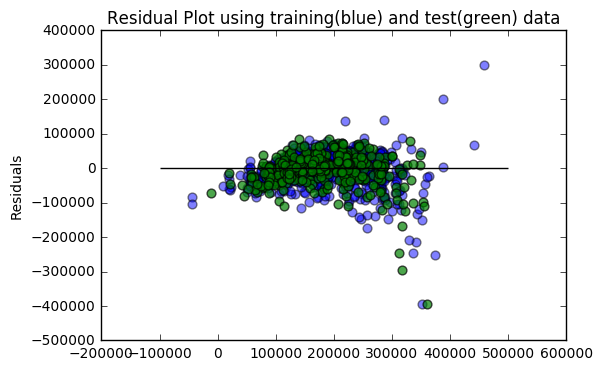

In [166]:
plt.scatter(
    linreg.predict(train_features),
    linreg.predict(train_features) - train_predict,
    c = 'b',
    s = 40,
    alpha = 0.5
)

plt.scatter(
    linreg.predict(test_features),
    linreg.predict(test_features) - test_predict,
    c = 'g',
    s = 40,
    alpha = 0.7
)

plt.hlines(y = 0, xmin = -100000, xmax = 500000)

plt.title('Residual Plot using training(blue) and test(green) data')
plt.ylabel('Residuals')
plt.show()

# RANDOM FOREST

### FIT

In [167]:
rf = RandomForestRegressor()
rf.fit(train_features,train_predict)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

### Predict

In [168]:
print "Instance prediction:", rf.predict(train_features)

Instance prediction: [ 174400.   145200.   215200.  ...,  118790.   191980.   176367.9]


### Accuracy

In [169]:
#Calculate Mean Squared Error on Test Dataset

mseFul = np.mean((test_predict - rf.predict(test_features)) ** 2)
mseFul

1611006216.2582371

In [193]:
#Calculate R2 on Train Dataset

SSE = np.sum((test_predict - rf.predict(test_features)) ** 2)
SST = np.sum((test_predict - np.mean(test_predict)) ** 2)

R2 = 1-(SSE/SST)
R2

0.7691337675518157

In [194]:
#Calculate R2 on Train Dataset

SSR = np.sum((rf.predict(test_features)- np.mean(test_predict)) ** 2)
SST = np.sum((test_predict - np.mean(test_predict)) ** 2)

R2 = (SSR/SST)
R2

0.87408082445005153

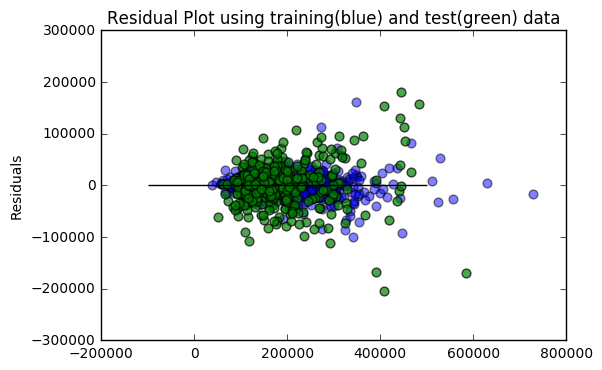

In [170]:
plt.scatter(
    rf.predict(train_features),
    rf.predict(train_features) - train_predict,
    c = 'b',
    s = 40,
    alpha = 0.5
)

plt.scatter(
    rf.predict(test_features),
    rf.predict(test_features) - test_predict,
    c = 'g',
    s = 40,
    alpha = 0.7
)

plt.hlines(y = 0, xmin = -100000, xmax = 500000)

plt.title('Residual Plot using training(blue) and test(green) data')
plt.ylabel('Residuals')
plt.show()

In [171]:
prediction, bias, contributions = ti.predict(rf, train_features)

for i in range(len(train_features[:5])):
    print "Instance", i
    print "Bias (trainset mean)", bias[i]
    print "Feature contributions:"
    for c, feature in sorted(zip(contributions[i], 
                                 train_features.columns), 
                             key=lambda x: -abs(x[0])):
        print feature, round(c, 2)
    print "-"*20 

Instance 0
Bias (trainset mean) 180859.417613
Feature contributions:
OverallQual 23535.62
YearBuilt -23438.64
LotArea -6803.36
GarageArea 246.97
--------------------
Instance 1
Bias (trainset mean) 180859.417613
Feature contributions:
OverallQual -49698.47
YearBuilt 17295.08
LotArea -14534.43
GarageArea 11278.4
--------------------
Instance 2
Bias (trainset mean) 180859.417613
Feature contributions:
OverallQual 23535.62
YearBuilt 14619.78
LotArea -10101.71
GarageArea 6286.89
--------------------
Instance 3
Bias (trainset mean) 180859.417613
Feature contributions:
OverallQual 189353.88
LotArea -28543.33
YearBuilt -20618.53
GarageArea -9151.44
--------------------
Instance 4
Bias (trainset mean) 180859.417613
Feature contributions:
OverallQual 23535.62
YearBuilt 13306.48
GarageArea 6203.51
LotArea -5215.02
--------------------
